In [0]:
import sys, os, platform, inspect

def get_current_file_path():
    # script filename (usually with path)
    filename = inspect.getfile(inspect.currentframe())
    # script directory
    path = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
    return filename, path


if platform.system() == 'Linux': # Colab setting
    print('Linux')
    from google.colab import drive
    drive.mount('/content/gdrive')
    path = '/content/gdrive/My Drive/Colab Notebooks/character_rnn'
else:
    _, path = get_current_file_path()    

sys.path.insert(0, path)
os.chdir(path)

Linux
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import utils
import rnn_char
import loaders
import importlib
importlib.reload(utils)
importlib.reload(rnn_char)
importlib.reload(loaders)

import numpy as np
import matplotlib.pyplot as plt

from loaders import DataSet, DataLoader
from rnn_char import CharRNNv1, CharRNNv2, CharRNNv3, CharRNNv4, CharRNNv5
from utils import Train

In [0]:
with open('data/anna.txt', 'r') as f:
    text = f.read()

nBatch = 64
nSeq = 100
frac = 0.2
nHidden = 256
nEpochs = 20

In [0]:
dSet = DataSet(text, nBatch, nSeq, frac)
train_loader = DataLoader(dSet('train'), dSet.nBatchSize, dSet.nSeqLength, dSet.nLabel, mode='many-1')
test_loader = DataLoader(dSet('test'), dSet.nBatchSize, dSet.nSeqLength, dSet.nLabel, mode='many-1')

In [0]:
rnnv1 = CharRNNv1(dSet.nLabel, nHidden, dSet.nLabel, dSet.encoder, nLayer=2, dropout=0.2)
train = Train(rnnv1, print_every=100, epochs=nEpochs)
hist_train, hist_test = train(train_loader, test_loader)


Epoch: 1/20 Train Loss: 3.144 Train Acc.: 0.165 Test loss: 3.154 Test Acc.: 0.160
Epoch: 2/20 Train Loss: 3.051 Train Acc.: 0.183 Test loss: 2.982 Test Acc.: 0.209
Epoch: 3/20 Train Loss: 2.570 Train Acc.: 0.289 Test loss: 2.596 Test Acc.: 0.291
Epoch: 4/20 Train Loss: 2.451 Train Acc.: 0.315 Test loss: 2.476 Test Acc.: 0.326
Epoch: 5/20 Train Loss: 2.319 Train Acc.: 0.350 Test loss: 2.367 Test Acc.: 0.344
Epoch: 6/20 Train Loss: 2.272 Train Acc.: 0.354 Test loss: 2.320 Test Acc.: 0.352
Epoch: 7/20 Train Loss: 2.149 Train Acc.: 0.383 Test loss: 2.257 Test Acc.: 0.367
Epoch: 8/20 Train Loss: 2.102 Train Acc.: 0.392 Test loss: 2.227 Test Acc.: 0.378
Epoch: 9/20 Train Loss: 2.000 Train Acc.: 0.422 Test loss: 2.188 Test Acc.: 0.385
Epoch: 10/20 Train Loss: 1.967 Train Acc.: 0.434 Test loss: 2.167 Test Acc.: 0.398
Epoch: 11/20 Train Loss: 1.850 Train Acc.: 0.462 Test loss: 2.141 Test Acc.: 0.400
Epoch: 12/20 Train Loss: 1.812 Train Acc.: 0.464 Test loss: 2.149 Test Acc.: 0.408
Epoch: 13/20

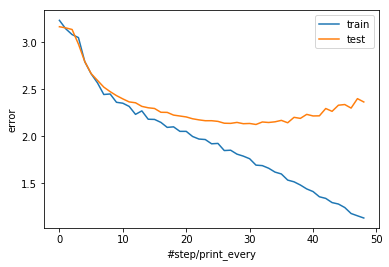

In [0]:
plt.xlabel('#step/print_every')
plt.ylabel('error')
plt.plot(hist_train, label='train')
plt.plot(hist_test, label='test')
plt.legend()

In [0]:
rnnv2 = CharRNNv2(dSet.nLabel, nHidden, dSet.nLabel, dSet.encoder, nLayer=2, dropout=0.2)
train = Train(rnnv2, print_every=100, epochs=nEpochs)
hist_train, hist_test = train(train_loader, test_loader)


Epoch: 1/20 Train Loss: 3.144 Train Acc.: 0.164 Test loss: 3.158 Test Acc.: 0.160
Epoch: 2/20 Train Loss: 3.127 Train Acc.: 0.166 Test loss: 3.154 Test Acc.: 0.160
Epoch: 3/20 Train Loss: 3.122 Train Acc.: 0.166 Test loss: 3.151 Test Acc.: 0.160
Epoch: 4/20 Train Loss: 3.120 Train Acc.: 0.167 Test loss: 3.154 Test Acc.: 0.160
Epoch: 5/20 Train Loss: 3.110 Train Acc.: 0.168 Test loss: 3.149 Test Acc.: 0.160
Epoch: 6/20 Train Loss: 3.125 Train Acc.: 0.166 Test loss: 3.155 Test Acc.: 0.160
Epoch: 7/20 Train Loss: 3.106 Train Acc.: 0.169 Test loss: 3.149 Test Acc.: 0.160
Epoch: 8/20 Train Loss: 3.113 Train Acc.: 0.167 Test loss: 3.157 Test Acc.: 0.160
Epoch: 9/20 Train Loss: 3.101 Train Acc.: 0.166 Test loss: 3.151 Test Acc.: 0.160
Epoch: 10/20 Train Loss: 3.109 Train Acc.: 0.168 Test loss: 3.158 Test Acc.: 0.160
Epoch: 11/20 Train Loss: 3.099 Train Acc.: 0.167 Test loss: 3.152 Test Acc.: 0.160
Epoch: 12/20 Train Loss: 3.105 Train Acc.: 0.168 Test loss: 3.158 Test Acc.: 0.160
Epoch: 13/20

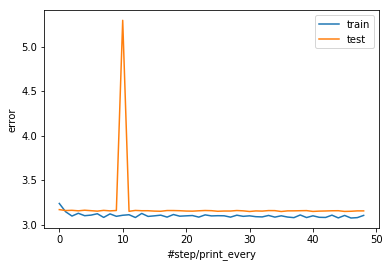

In [0]:
plt.xlabel('#step/print_every')
plt.ylabel('error')
plt.plot(hist_train, label='train')
plt.plot(hist_test, label='test')
plt.legend()

In [0]:
rnnv3 = CharRNNv3(nSeq, dSet.nLabel, nHidden, dSet.nLabel, dSet.encoder, nLayer=2, dropout=0.2)
train = Train(rnnv3, print_every=100, epochs=nEpochs)
hist_train, hist_test = train(train_loader, test_loader)


Epoch: 1/20 Train Loss: 3.160 Train Acc.: 0.162 Test loss: 3.164 Test Acc.: 0.133
Epoch: 2/20 Train Loss: 3.131 Train Acc.: 0.166 Test loss: 3.160 Test Acc.: 0.160
Epoch: 3/20 Train Loss: 3.116 Train Acc.: 0.165 Test loss: 3.149 Test Acc.: 0.160
Epoch: 4/20 Train Loss: 3.103 Train Acc.: 0.167 Test loss: 3.142 Test Acc.: 0.160
Epoch: 5/20 Train Loss: 3.011 Train Acc.: 0.182 Test loss: 3.046 Test Acc.: 0.180
Epoch: 6/20 Train Loss: 2.898 Train Acc.: 0.210 Test loss: 2.940 Test Acc.: 0.200
Epoch: 7/20 Train Loss: 2.601 Train Acc.: 0.281 Test loss: 2.636 Test Acc.: 0.282
Epoch: 8/20 Train Loss: 2.409 Train Acc.: 0.321 Test loss: 2.460 Test Acc.: 0.321
Epoch: 9/20 Train Loss: 2.177 Train Acc.: 0.383 Test loss: 2.317 Test Acc.: 0.353
Epoch: 10/20 Train Loss: 2.088 Train Acc.: 0.391 Test loss: 2.245 Test Acc.: 0.381
Epoch: 11/20 Train Loss: 1.923 Train Acc.: 0.438 Test loss: 2.216 Test Acc.: 0.393
Epoch: 12/20 Train Loss: 1.856 Train Acc.: 0.449 Test loss: 2.205 Test Acc.: 0.400
Epoch: 13/20

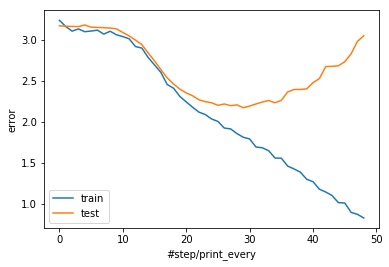

In [0]:
plt.xlabel('#step/print_every')
plt.ylabel('error')
plt.plot(hist_train, label='train')
plt.plot(hist_test, label='test')
plt.legend()

In [0]:
train_loader = DataLoader(dSet('train'), dSet.nBatchSize, dSet.nSeqLength, dSet.nLabel, mode='many-many')
test_loader = DataLoader(dSet('test'), dSet.nBatchSize, dSet.nSeqLength, dSet.nLabel, mode='many-many')

rnnv4 = CharRNNv4(dSet.nLabel, nHidden, dSet.nLabel, dSet.encoder, nLayer=2, dropout=0.2)
train = Train(rnnv4, print_every=100, epochs=nEpochs)
hist_train, hist_test = train(train_loader, test_loader)


Epoch: 1/20 Train Loss: 2.991 Train Acc.: 0.192 Test loss: 2.745 Test Acc.: 0.252
Epoch: 2/20 Train Loss: 2.414 Train Acc.: 0.318 Test loss: 2.343 Test Acc.: 0.343
Epoch: 3/20 Train Loss: 2.148 Train Acc.: 0.384 Test loss: 2.098 Test Acc.: 0.403
Epoch: 4/20 Train Loss: 2.029 Train Acc.: 0.413 Test loss: 1.976 Test Acc.: 0.436
Epoch: 5/20 Train Loss: 1.880 Train Acc.: 0.450 Test loss: 1.831 Test Acc.: 0.470
Epoch: 6/20 Train Loss: 1.800 Train Acc.: 0.470 Test loss: 1.754 Test Acc.: 0.490
Epoch: 7/20 Train Loss: 1.704 Train Acc.: 0.495 Test loss: 1.666 Test Acc.: 0.514
Epoch: 8/20 Train Loss: 1.650 Train Acc.: 0.509 Test loss: 1.616 Test Acc.: 0.527
Epoch: 9/20 Train Loss: 1.587 Train Acc.: 0.525 Test loss: 1.556 Test Acc.: 0.541
Epoch: 10/20 Train Loss: 1.549 Train Acc.: 0.536 Test loss: 1.524 Test Acc.: 0.551
Epoch: 11/20 Train Loss: 1.502 Train Acc.: 0.548 Test loss: 1.482 Test Acc.: 0.561
Epoch: 12/20 Train Loss: 1.472 Train Acc.: 0.556 Test loss: 1.460 Test Acc.: 0.567
Epoch: 13/20

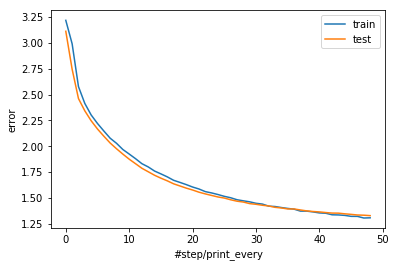

In [0]:
plt.xlabel('#step/print_every')
plt.ylabel('error')
plt.plot(hist_train, label='train')
plt.plot(hist_test, label='test')
plt.legend()

In [0]:
train_loader = DataLoader(dSet('train'), dSet.nBatchSize, dSet.nSeqLength, dSet.nLabel, mode='many-many')
test_loader = DataLoader(dSet('test'), dSet.nBatchSize, dSet.nSeqLength, dSet.nLabel, mode='many-many')

rnnv5 = CharRNNv5(nSeq, dSet.nLabel, nHidden, dSet.nLabel, dSet.encoder, nLayer=2, dropout=0.2)
train = Train(rnnv5, print_every=100, epochs=nEpochs)
hist_train, hist_test = train(train_loader, test_loader)


Epoch: 1/20 Train Loss: 3.174 Train Acc.: 0.162 Test loss: 3.165 Test Acc.: 0.162
Epoch: 2/20 Train Loss: 2.979 Train Acc.: 0.185 Test loss: 2.893 Test Acc.: 0.215
Epoch: 3/20 Train Loss: 2.443 Train Acc.: 0.314 Test loss: 2.382 Test Acc.: 0.337
Epoch: 4/20 Train Loss: 2.292 Train Acc.: 0.347 Test loss: 2.241 Test Acc.: 0.365
Epoch: 5/20 Train Loss: 2.138 Train Acc.: 0.384 Test loss: 2.096 Test Acc.: 0.400
Epoch: 6/20 Train Loss: 2.067 Train Acc.: 0.399 Test loss: 2.020 Test Acc.: 0.420
Epoch: 7/20 Train Loss: 1.973 Train Acc.: 0.425 Test loss: 1.924 Test Acc.: 0.448
Epoch: 8/20 Train Loss: 1.921 Train Acc.: 0.440 Test loss: 1.870 Test Acc.: 0.463
Epoch: 9/20 Train Loss: 1.850 Train Acc.: 0.458 Test loss: 1.806 Test Acc.: 0.478
Epoch: 10/20 Train Loss: 1.812 Train Acc.: 0.468 Test loss: 1.762 Test Acc.: 0.488
Epoch: 11/20 Train Loss: 1.758 Train Acc.: 0.481 Test loss: 1.714 Test Acc.: 0.502
Epoch: 12/20 Train Loss: 1.731 Train Acc.: 0.488 Test loss: 1.685 Test Acc.: 0.509
Epoch: 13/20

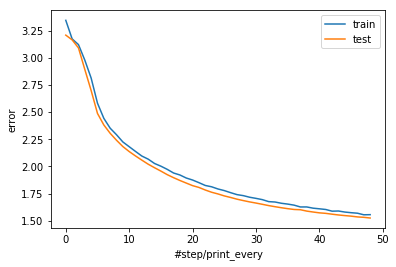

In [0]:
plt.xlabel('#step/print_every')
plt.ylabel('error')
plt.plot(hist_train, label='train')
plt.plot(hist_test, label='test')
plt.legend()

In [0]:
prime = ''.join([dSet.decoder[i] for i in dSet('test')[400:500]])

print(rnnv1.sample(400, prime=prime, top_k=5))

 antien they were
and dikly sbight the cams abling manky he smole to here in I motting monter it the mailing with him seith and his dide her.

"Enday feey day him dede in one to a mar to a miring
with the had been pasidiof a lefhed the ot
mentain of the weal, and she said
timl himsting her has be of him to the onded the wores she megeriened a
cemtry of the bend
him to hears, and nct min
peritiyy fu


In [0]:
print(rnnv2.sample(400, prime=prime, top_k=5))

eoeaet eato  a net e  an nat aennatn   tteo aaaeattetnt t eeee ea neaoeeee ne nna  ea  te at nt t na e enaa n aaette   eenaen naatteenetenntatet e e n e e e   e ate nn nnaaa  eaatn e tte tataeaot attat e te neae  eeaeeaat ea t   ta   te o eeteatteeoa tnta   e  e eat  nee annt a  noaaeeeeattoe t  nto eo t oen atn et aetanta    e nateeae  e n eanttne     t t eat aa t teenttet  t enn e ot oenenatoeeee


In [0]:
print(rnnv3.sample(400, prime=prime, top_k=5))

flowerbeds,
but lay out your beds so as to take advantage of the tree. You won't
grow him again in a merrent; dus in
a frevie done with hor heefurthing; besighted peing in hif, whil  we wis to Vrongk sgey her
ole indelf, and the ows den't
look for goo the how rowo howw sudned to her weit noo hea with delpget him enfully..."

"Oo," duy head she cond
inton his. Ifanorevinwalled to ha d benned farme the ocherbugly, facl in he mastledf o cone the har dononckys'ad
said..
"Yourres -resting
piffully, an


In [0]:
print(rnnv4.sample(400, prime=prime, top_k=5))

 smiling in a lan for and think this study, and are stridit in the strain where isselve, he had nothing; but I can't take it for my.

She would never stand a goid of a latch and
stick, but a sillight, took of the
serventen so well, becidied to be all him that the position, there are always they say that he say all, and with till me the prince starling himself. I seak him that try on anothing bare t


In [0]:
print(rnnv5.sample(400, prime=prime, top_k=5))

flowerbeds,
but lay out your beds so as to take advantage of the tree. You won't
grow him again in attoring are sud tell,"" side that they was a drew without back and went of
spene and self, but ask a come, after him a littre on the ridurge, they with the stine of she had bathen and that in an offering time. She was somether shame she washed to her ala conversang that which he alone them he asken, without
to the peation, and, in
them had
beenginess of suct could, a smore the carrially, stands the


In [0]:
torch.save(rnnv1.state_dict(), 'rnnv1_20epoch_checkpoint.pt')
torch.save(rnnv2.state_dict(), 'rnnv2_20epoch_checkpoint.pt')
torch.save(rnnv3.state_dict(), 'rnnv3_20epoch_checkpoint.pt')
torch.save(rnnv4.state_dict(), 'rnnv4_20epoch_checkpoint.pt')
torch.save(rnnv5.state_dict(), 'rnnv5_20epoch_checkpoint.pt')

Plot the values of alpha after training. The last few hidden variables get more weight and favored by the optimization algorithm. This shows why pure averaging is detrimental and picking the last hidden variable works better than the simplpe averaging

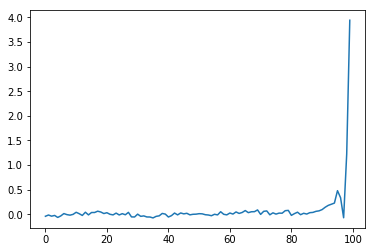

In [0]:
plt.plot(rnnv3.state_dict()['alpha'].cpu().numpy())

The values for alpha show a flat and nearly 1 for all values. As Meisam pointed out, this shows that v4 (using all hidden variables without modification) works better than all the other variants 

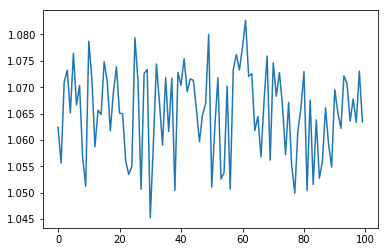

In [0]:
plt.plot(rnnv5.state_dict()['alpha'].cpu().numpy())